<a href="https://colab.research.google.com/github/sreelekshmyanil/DL-Assignments---VIT/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Activity1/datasets.zip

Archive:  /content/drive/MyDrive/Activity1/datasets.zip
   creating: datasets/
   creating: datasets/train/
   creating: datasets/train/cat/
  inflating: datasets/train/cat/cat.10000.jpg  
  inflating: datasets/train/cat/cat.10001.jpg  
  inflating: datasets/train/cat/cat.10002.jpg  
  inflating: datasets/train/cat/cat.10003.jpg  
  inflating: datasets/train/cat/cat.10004.jpg  
  inflating: datasets/train/cat/cat.10005.jpg  
  inflating: datasets/train/cat/cat.10006.jpg  
  inflating: datasets/train/cat/cat.10007.jpg  
  inflating: datasets/train/cat/cat.10008.jpg  
  inflating: datasets/train/cat/cat.10009.jpg  
  inflating: datasets/train/cat/cat.10010.jpg  
  inflating: datasets/train/cat/cat.10011.jpg  
  inflating: datasets/train/cat/cat.10012.jpg  
  inflating: datasets/train/cat/cat.10013.jpg  
  inflating: datasets/train/cat/cat.10014.jpg  
  inflating: datasets/train/cat/cat.10015.jpg  
  inflating: datasets/train/cat/cat.10016.jpg  
  inflating: datasets/train/cat/cat.10017.j

In [ ]:
!pip install mahotas

#-----------------------------------
# GLOBAL FEATURE EXTRACTION
#-----------------------------------
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import mahotas
import cv2
import os
import h5py

#--------------------
# tunable-parameters
#--------------------
images_per_class = 80
fixed_size       = tuple((500, 500))
train_path       = "datasets/train"
h5_data          = 'output/data.h5'
h5_labels        = 'output/labels.h5'
bins             = 8

     |████████████████████████████████| 5.7MB 9.6MB/s 


In [ ]:
# feature-descriptor-1: Hu Moments
def fd_hu_moments(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature

In [ ]:
# feature-descriptor-2: Haralick Texture
def fd_haralick(image):
    # convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # compute the haralick texture feature vector
    haralick = mahotas.features.haralick(gray).mean(axis=0)
    # return the result
    return haralick

In [ ]:
# feature-descriptor-3: Color Histogram
def fd_histogram(image, mask=None):
    # convert the image to HSV color-space
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # compute the color histogram
    hist  = cv2.calcHist([image], [0, 1, 2], None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])
    # normalize the histogram
    cv2.normalize(hist, hist)
    # return the histogram
    return hist.flatten()

In [ ]:
# get the training labels
train_labels = os.listdir(train_path)

# sort the training labels
train_labels.sort()
print(train_labels)

# empty lists to hold feature vectors and labels
global_features = []
labels          = []

['cat', 'dog']


In [ ]:
# loop over the training data sub-folders

#Step 1 : Read image from folder

# loop over the input images



for training_name in train_labels:
    # join the training data path and each species training folder
    dir = os.path.join(train_path, training_name)

    # get the current training label
    current_label = training_name

    # loop over the images in each sub-folder
    for (i, imagePath) in enumerate(os.listdir(dir)):
        # get the image file name
        # read the image and resize it to a fixed-size

#Step 2 : Store image as numpy array
        image = cv2.imread(os.path.join(dir,imagePath))
        print("The image stored as : ",type(image))
        image = cv2.resize(image, fixed_size)

#Step 3 : Feature extraction

        ####################################
        # Global Feature extraction
        ####################################
        fv_hu_moments = fd_hu_moments(image)  #Shape
        fv_haralick   = fd_haralick(image)    #Texture
        fv_histogram  = fd_histogram(image)   #Color

        ###################################
        # Concatenate global features
        ###################################
        global_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])

        # update the list of labels and feature vectors
        labels.append(current_label)
        global_features.append(global_feature)

    print("[STATUS] processed folder: {}".format(current_label))

print("[STATUS] completed Global Feature Extraction...")

The image stored as :  <class 'numpy.ndarray'>
The image stored as :  <class 'numpy.ndarray'>
The image stored as :  <class 'numpy.ndarray'>
The image stored as :  <class 'numpy.ndarray'>
The image stored as :  <class 'numpy.ndarray'>
The image stored as :  <class 'numpy.ndarray'>
The image stored as :  <class 'numpy.ndarray'>
The image stored as :  <class 'numpy.ndarray'>
The image stored as :  <class 'numpy.ndarray'>
The image stored as :  <class 'numpy.ndarray'>
The image stored as :  <class 'numpy.ndarray'>
The image stored as :  <class 'numpy.ndarray'>
The image stored as :  <class 'numpy.ndarray'>
The image stored as :  <class 'numpy.ndarray'>
The image stored as :  <class 'numpy.ndarray'>
The image stored as :  <class 'numpy.ndarray'>
The image stored as :  <class 'numpy.ndarray'>
The image stored as :  <class 'numpy.ndarray'>
The image stored as :  <class 'numpy.ndarray'>
The image stored as :  <class 'numpy.ndarray'>
The image stored as :  <class 'numpy.ndarray'>
The image sto

In [ ]:
#Features
"""
By features we mean, basically, numerical functions of the image. 

"""

'\nBy features we mean, basically, numerical functions of the image. \n\n'

The label is :  cat
The image stored as :  <class 'numpy.ndarray'>
The input image is :  



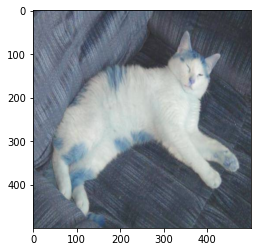

The first feature : 

 
Hu Moments are used to characterize the outline or “silhouette” of an object in an image.

 Computed value : [ 1.15175226e-03  4.70271551e-09  1.12813643e-11  1.14758050e-12
 -1.28262374e-24  3.40877592e-17 -3.92483825e-24]
The second feature : 

 
These are texture features, based on the adjacency matrix (the adjacency matrix stores in position (i,j) the number of times that a pixel takes the value i next to a pixel with the value j. Given different ways to define next to, you obtain slightly different variations of the features. Standard practice is to average them out across the directions to get some rotational invariance.

 Computed value : [ 5.63499074e-04  3.56149940e+01  9.93492508e-01  2.73618618e+03
  2.84162391e-01  2.44419922e+02  1.09091297e+04  8.26689157e+00
  1.14903521e+01  4.80902152e-04  3.51836661e+00 -4.20942430e-01
  9.98780860e-01]
The third feature : 


 Computed value :


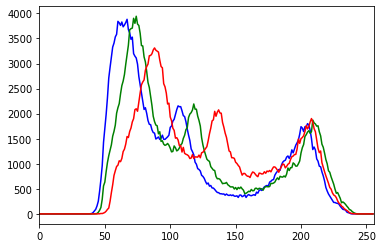

The fourth feature : 

[ 88  93 109 ...  49  58  67]
Edge features : 


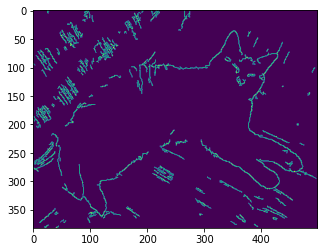

The image stored as :  <class 'numpy.ndarray'>
The input image is :  



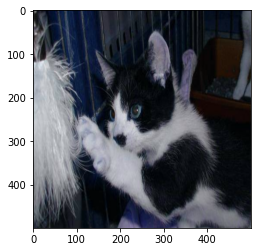

The first feature : 

 
Hu Moments are used to characterize the outline or “silhouette” of an object in an image.

 Computed value : [ 2.08639981e-03  8.24803397e-08  4.87225443e-11  5.98227622e-10
 -9.52610347e-20  6.17659367e-14 -3.68295657e-20]
The second feature : 

 
These are texture features, based on the adjacency matrix (the adjacency matrix stores in position (i,j) the number of times that a pixel takes the value i next to a pixel with the value j. Given different ways to define next to, you obtain slightly different variations of the features. Standard practice is to average them out across the directions to get some rotational invariance.

 Computed value : [ 1.33768122e-03  7.82548767e+01  9.90182275e-01  3.98584208e+03
  3.23736384e-01  1.35638385e+02  1.58651135e+04  8.19098983e+00
  1.15338278e+01  4.79585824e-04  3.75473504e+00 -3.99500566e-01
  9.98001681e-01]
The third feature : 


 Computed value :


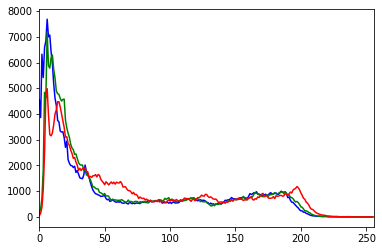

The fourth feature : 

[25 28 27 ... 74 74 86]
Edge features : 


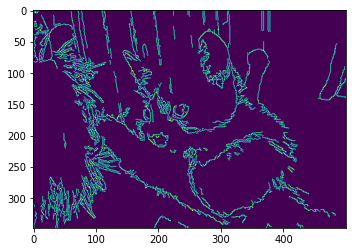

The image stored as :  <class 'numpy.ndarray'>
The input image is :  



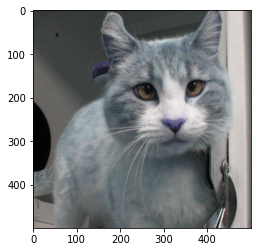

The first feature : 

 
Hu Moments are used to characterize the outline or “silhouette” of an object in an image.

 Computed value : [ 1.40063666e-03  3.17507127e-08  7.17717698e-12  1.03268280e-11
  8.85947936e-23  1.22902514e-15 -7.42294293e-24]
The second feature : 

 
These are texture features, based on the adjacency matrix (the adjacency matrix stores in position (i,j) the number of times that a pixel takes the value i next to a pixel with the value j. Given different ways to define next to, you obtain slightly different variations of the features. Standard practice is to average them out across the directions to get some rotational invariance.

 Computed value : [ 1.32072089e-03  5.45008251e+01  9.87969007e-01  2.26506281e+03
  3.76669768e-01  2.27532589e+02  9.00575041e+03  8.32740718e+00
  1.14043827e+01  5.41396210e-04  3.47510898e+00 -4.49767657e-01
  9.99246665e-01]
The third feature : 


 Computed value :


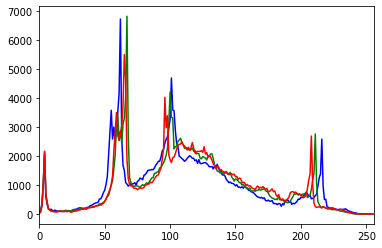

The fourth feature : 

[ 56  59  57 ... 156 143 141]
Edge features : 


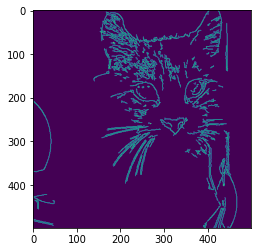

The image stored as :  <class 'numpy.ndarray'>
The input image is :  



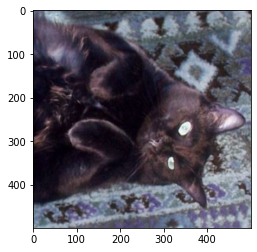

The first feature : 

 
Hu Moments are used to characterize the outline or “silhouette” of an object in an image.

 Computed value : [ 2.43660586e-03  9.33609447e-08  4.06156952e-11  4.60474034e-10
 -4.73779576e-20 -1.10485992e-13  4.14841292e-20]
The second feature : 

 
These are texture features, based on the adjacency matrix (the adjacency matrix stores in position (i,j) the number of times that a pixel takes the value i next to a pixel with the value j. Given different ways to define next to, you obtain slightly different variations of the features. Standard practice is to average them out across the directions to get some rotational invariance.

 Computed value : [ 5.47069017e-04  5.47786675e+01  9.89963586e-01  2.72892357e+03
  2.64437633e-01  1.55501506e+02  1.08609156e+04  8.48889346e+00
  1.19144890e+01  3.94516498e-04  3.77021517e+00 -4.10144222e-01
  9.98814666e-01]
The third feature : 


 Computed value :


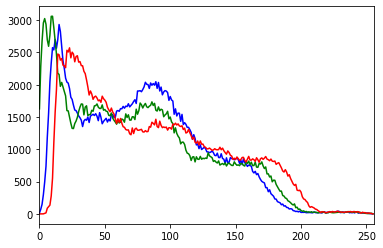

The fourth feature : 

[ 85  92 112 ... 172 175 187]
Edge features : 


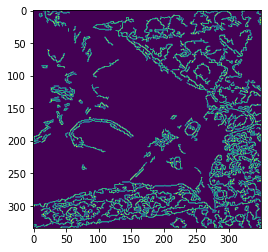

The image stored as :  <class 'numpy.ndarray'>
The input image is :  



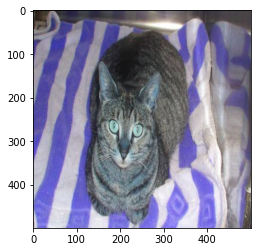

The first feature : 

 
Hu Moments are used to characterize the outline or “silhouette” of an object in an image.

 Computed value : [ 1.28923425e-03  1.78893371e-09  1.25282915e-11  1.80130156e-11
 -8.83992540e-23 -4.30072200e-16  2.55752184e-22]
The second feature : 

 
These are texture features, based on the adjacency matrix (the adjacency matrix stores in position (i,j) the number of times that a pixel takes the value i next to a pixel with the value j. Given different ways to define next to, you obtain slightly different variations of the features. Standard practice is to average them out across the directions to get some rotational invariance.

 Computed value : [ 2.96057587e-04  9.18616950e+01  9.82047712e-01  2.55847678e+03
  2.48851376e-01  2.63282809e+02  1.01420454e+04  8.63058126e+00
  1.24667857e+01  3.51461442e-04  4.02935052e+00 -3.67923587e-01
  9.97827018e-01]
The third feature : 


 Computed value :


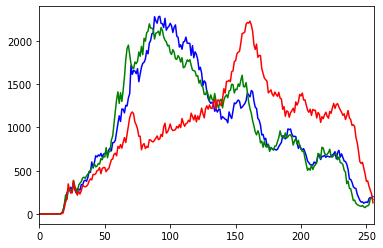

The fourth feature : 

[41 31 22 ... 77 67 60]
Edge features : 


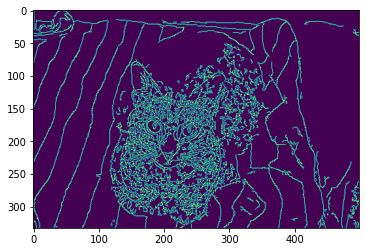

The label is :  dog
The image stored as :  <class 'numpy.ndarray'>
The input image is :  



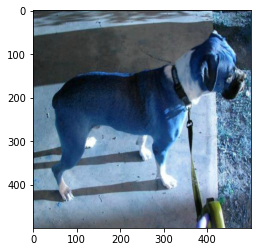

The first feature : 

 
Hu Moments are used to characterize the outline or “silhouette” of an object in an image.

 Computed value : [ 1.43613417e-03  6.41799646e-09  5.47514928e-11  9.06496501e-11
  1.17627914e-21 -6.83712032e-15  6.27700518e-21]
The second feature : 

 
These are texture features, based on the adjacency matrix (the adjacency matrix stores in position (i,j) the number of times that a pixel takes the value i next to a pixel with the value j. Given different ways to define next to, you obtain slightly different variations of the features. Standard practice is to average them out across the directions to get some rotational invariance.

 Computed value : [ 3.97807386e-04  1.95990646e+02  9.72979213e-01  3.62626948e+03
  2.88171013e-01  2.26608085e+02  1.43090873e+04  8.75192229e+00
  1.25001690e+01  4.14625102e-04  4.04743323e+00 -3.88507171e-01
  9.98639626e-01]
The third feature : 


 Computed value :


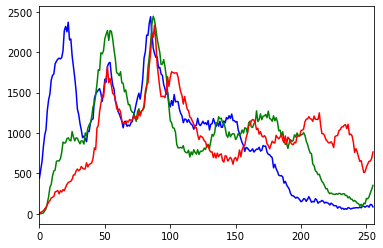

The fourth feature : 

[ 57  59  68 ...  63  78 104]
Edge features : 


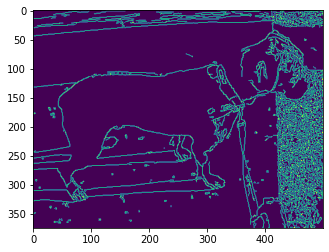

The image stored as :  <class 'numpy.ndarray'>
The input image is :  



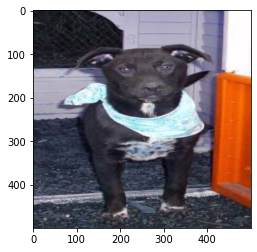

The first feature : 

 
Hu Moments are used to characterize the outline or “silhouette” of an object in an image.

 Computed value : [ 1.63650983e-03  9.66229733e-08  9.38526681e-11  5.28731207e-11
 -2.95353509e-21  1.17988339e-14 -2.26914649e-21]
The second feature : 

 
These are texture features, based on the adjacency matrix (the adjacency matrix stores in position (i,j) the number of times that a pixel takes the value i next to a pixel with the value j. Given different ways to define next to, you obtain slightly different variations of the features. Standard practice is to average them out across the directions to get some rotational invariance.

 Computed value : [ 8.27984557e-04  1.01962126e+02  9.88345834e-01  4.37435865e+03
  2.96730612e-01  1.93937407e+02  1.73954725e+04  8.38064577e+00
  1.19407933e+01  3.89112569e-04  3.93280505e+00 -3.88215624e-01
  9.98015736e-01]
The third feature : 


 Computed value :


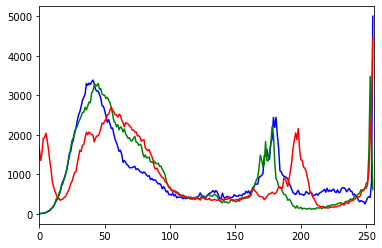

The fourth feature : 

[27 30 35 ... 39 43 50]
Edge features : 


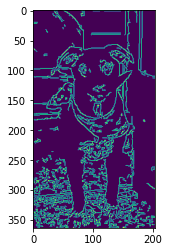

The image stored as :  <class 'numpy.ndarray'>
The input image is :  



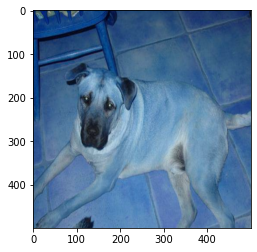

The first feature : 

 
Hu Moments are used to characterize the outline or “silhouette” of an object in an image.

 Computed value : [ 1.26149587e-03  6.34236235e-10  1.08389972e-11  1.09303748e-11
  1.87055258e-23 -2.73083112e-16  1.17492955e-22]
The second feature : 

 
These are texture features, based on the adjacency matrix (the adjacency matrix stores in position (i,j) the number of times that a pixel takes the value i next to a pixel with the value j. Given different ways to define next to, you obtain slightly different variations of the features. Standard practice is to average them out across the directions to get some rotational invariance.

 Computed value : [ 7.11645359e-04  4.28586103e+01  9.82061380e-01  1.19460829e+03
  3.20178677e-01  2.39130322e+02  4.73557454e+03  8.10901000e+00
  1.13356704e+01  5.79236923e-04  3.44471913e+00 -4.07377500e-01
  9.98279441e-01]
The third feature : 


 Computed value :


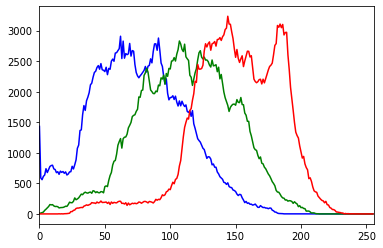

The fourth feature : 

[ 93 118 123 ...  93 122 153]
Edge features : 


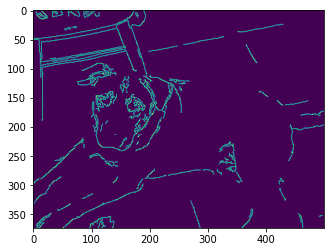

The image stored as :  <class 'numpy.ndarray'>
The input image is :  



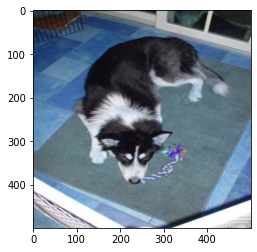

The first feature : 

 
Hu Moments are used to characterize the outline or “silhouette” of an object in an image.

 Computed value : [ 1.43985090e-03  7.60233510e-09  5.13170521e-11  2.26131678e-11
  7.70292232e-22 -1.09520356e-15 -6.90354165e-24]
The second feature : 

 
These are texture features, based on the adjacency matrix (the adjacency matrix stores in position (i,j) the number of times that a pixel takes the value i next to a pixel with the value j. Given different ways to define next to, you obtain slightly different variations of the features. Standard practice is to average them out across the directions to get some rotational invariance.

 Computed value : [ 7.60767169e-04  9.12584632e+01  9.86474495e-01  3.37445391e+03
  2.96772760e-01  2.38148803e+02  1.34065572e+04  8.44899842e+00
  1.19345637e+01  4.23708571e-04  3.80205957e+00 -4.03567086e-01
  9.98631040e-01]
The third feature : 


 Computed value :


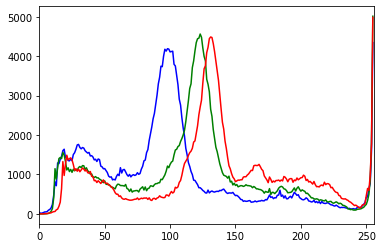

The fourth feature : 

[ 43  59  74 ... 188 183 184]
Edge features : 


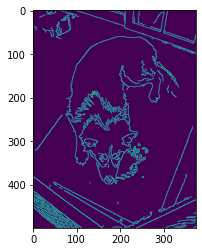

The image stored as :  <class 'numpy.ndarray'>
The input image is :  



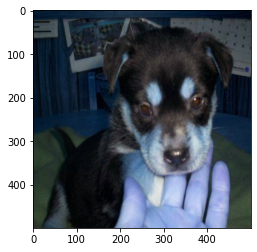

The first feature : 

 
Hu Moments are used to characterize the outline or “silhouette” of an object in an image.

 Computed value : [ 2.24846943e-03  2.31321899e-07  2.15486507e-11  1.35171304e-09
 -2.27386485e-19  6.26154181e-13 -3.89259589e-20]
The second feature : 

 
These are texture features, based on the adjacency matrix (the adjacency matrix stores in position (i,j) the number of times that a pixel takes the value i next to a pixel with the value j. Given different ways to define next to, you obtain slightly different variations of the features. Standard practice is to average them out across the directions to get some rotational invariance.

 Computed value : [ 9.17937023e-04  3.43337045e+01  9.94721416e-01  3.25157986e+03
  3.53959615e-01  1.30599405e+02  1.29719857e+04  8.20690845e+00
  1.12168371e+01  5.77154972e-04  3.30963971e+00 -4.45067331e-01
  9.99052044e-01]
The third feature : 


 Computed value :


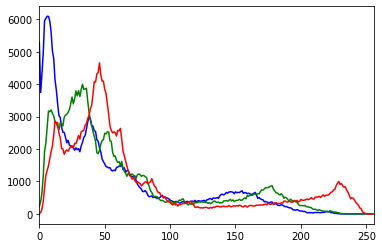

The fourth feature : 

[ 4 27 49 ... 58 69 49]
Edge features : 


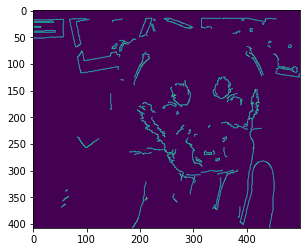

In [ ]:
from matplotlib import pyplot as plt
for training_name in train_labels:
    # join the training data path and each species training folder
    dir = os.path.join(train_path, training_name)
    current_label = training_name
    print("The label is : ",current_label)
    for (i, imagePath) in enumerate(os.listdir(dir)):
      if i == 5:
        break
      else:
        # get the image file name
        # read the image and resize it to a fixed-size
        image = cv2.imread(os.path.join(dir,imagePath))
        print("The image stored as : ",type(image))
        image = cv2.resize(image, fixed_size)
        print("The input image is :  \n")
        plt.imshow(image)
        plt.show()
        fv_hu_moments = fd_hu_moments(image)  #Shape
        fv_haralick   = fd_haralick(image)    #Texture
        fv_histogram  = fd_histogram(image)   #Color
        print("The first feature : \n")
        print(" \nHu Moments are used to characterize the outline or “silhouette” of an object in an image.")
        print("\n Computed value :",fv_hu_moments)
        print("The second feature : \n")
        print(" \nThese are texture features, based on the adjacency matrix (the adjacency matrix stores in position (i,j) the number of times that a pixel takes the value i next to a pixel with the value j. Given different ways to define next to, you obtain slightly different variations of the features. Standard practice is to average them out across the directions to get some rotational invariance.")
        print("\n Computed value :",fv_haralick)
        print("The third feature : \n")
        print("\n Computed value :")
        color = ('b','g','r')
        for i,col in enumerate(color):
            histr = cv2.calcHist([image],[i],None,[256],[0,256])
            plt.plot(histr,color = col)
            plt.xlim([0,256])
        plt.show()
        print("The fourth feature : \n")
        features = cv2.resize(image, (32,32)).flatten()
        print(features)
        print("Edge features : ")
        # Apply Canny detector 
        img = cv2.imread(os.path.join(dir,imagePath),0)
        edges = cv2.Canny(img,100,200)
        plt.imshow(edges)
        plt.show()

In [ ]:
# get the overall feature vector size
print("[STATUS] feature vector size {}".format(np.array(global_features).shape))
# parent_dir = '/content/datasets'
# directory = "output"
# pth = os.path.join(parent_dir,directory)
# os.mkdir(pth)
# get the overall training label size
print("[STATUS] training Labels {}".format(np.array(labels).shape))

# encode the target labels
targetNames = np.unique(labels)
le          = LabelEncoder()
target      = le.fit_transform(labels)
print("[STATUS] training labels encoded...")

# scale features in the range (0-1)
scaler            = MinMaxScaler(feature_range=(0, 1))
rescaled_features = scaler.fit_transform(global_features)
print("[STATUS] feature vector normalized...")

print("[STATUS] target labels: {}".format(target))
print("[STATUS] target labels shape: {}".format(target.shape))

# save the feature vector using HDF5
h5f_data = h5py.File('data.h5', 'w')
h5f_data.create_dataset('dataset_1', data=np.array(rescaled_features))

h5f_label = h5py.File('labels.h5', 'w')
h5f_label.create_dataset('dataset_1', data=np.array(target))

h5f_data.close()
h5f_label.close()

print("[STATUS] end of training..")

[STATUS] feature vector size (2808, 532)
[STATUS] training Labels (2808,)
[STATUS] training labels encoded...
[STATUS] feature vector normalized...
[STATUS] target labels: [0 0 0 ... 1 1 1]
[STATUS] target labels shape: (2808,)
[STATUS] end of training..


In [ ]:
#-----------------------------------
# TRAINING OUR MODEL
#-----------------------------------
import h5py
import numpy as np
import os
import glob
import cv2
import warnings
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.externals import joblib

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#--------------------
# tunable-parameters
#--------------------
test_size = 0.10
train_path = "/content/datasets/train"
#test_path  = "dataset/test"
h5_data    = '/content/data.h5'
h5_labels  = '/content/labels.h5'
scoring    = "accuracy"


In [ ]:
# variables to hold the results and names
results = []
names   = []

# import the feature vector and trained labels
h5f_data  = h5py.File(h5_data, 'r')
h5f_label = h5py.File(h5_labels, 'r')

global_features_string = h5f_data['dataset_1']
global_labels_string   = h5f_label['dataset_1']

global_features = np.array(global_features_string)
global_labels   = np.array(global_labels_string)

h5f_data.close()
h5f_label.close()

In [ ]:
 #verify the shape of the feature vector and labels
print("[STATUS] features shape: {}".format(global_features.shape))
print("[STATUS] labels shape: {}".format(global_labels.shape))

print("[STATUS] training started...")

[STATUS] features shape: (2808, 532)
[STATUS] labels shape: (2808,)
[STATUS] training started...


In [ ]:
#Step 4 : split train and test
# scale features in the range (0-1)

# split the training and testing data
(trainDataGlobal, testDataGlobal, trainLabelsGlobal, testLabelsGlobal) = train_test_split(np.array(global_features),
                                                                                          np.array(global_labels),
                                                                                          test_size=test_size,
                                                                                          stratify = np.array(global_labels),
                                                                                          random_state=42)

[0 1] [1266 1261]


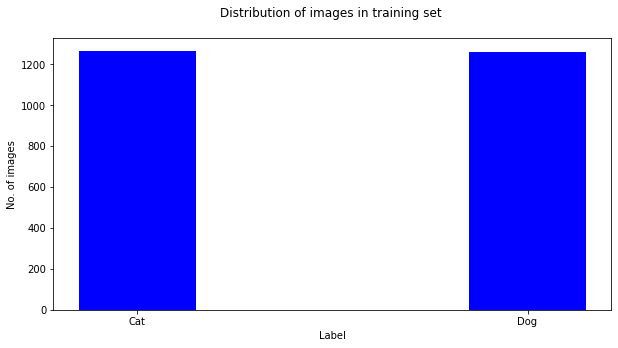

In [ ]:
unique_rows,counts_elements = np.unique(trainLabelsGlobal,return_counts=True,  axis=0)
print(unique_rows,counts_elements)
fig = plt.figure(figsize = (10, 5)) 
labels = ['Cat','Dog']
# creating the bar plot 
plt.bar(labels, counts_elements, color ='blue',  width = 0.3) 
  
plt.xlabel("Label") 
plt.ylabel("No. of images") 
plt.title("Distribution of images in training set \n") 
plt.show() 

In [ ]:
print("[STATUS] splitted train and test data...")
print("Train data  : {}".format(trainDataGlobal.shape))
print("Test data   : {}".format(testDataGlobal.shape))
print("Train labels: {}".format(trainLabelsGlobal.shape))
print("Test labels : {}".format(testLabelsGlobal.shape))

[STATUS] splitted train and test data...
Train data  : (2527, 532)
Test data   : (281, 532)
Train labels: (2527,)
Test labels : (281,)


In [ ]:
#Step 5 : Learning Algorithm

In [ ]:
#Importing MLPClassifier
from sklearn.neural_network import MLPClassifier

#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)

In [ ]:
#Fitting the training data to the network
classifier.fit(trainDataGlobal,trainLabelsGlobal)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(150, 100, 50), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
#Predicting y for X_val
y_pred = classifier.predict(testDataGlobal)

In [ ]:
print(y_pred)

[1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0
 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 0 1
 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 0
 0 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1
 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0]


In [ ]:
#Step 6 : Accuracy

In [ ]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [ ]:
#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(y_pred, testLabelsGlobal)

#Printing the accuracy
print("Accuracy of MLPClassifier : ", accuracy(cm))

Accuracy of MLPClassifier :  0.6512455516014235


In [ ]:
print("The confusion matrix : \n",cm)

The confusion matrix : 
 [[94 51]
 [47 89]]


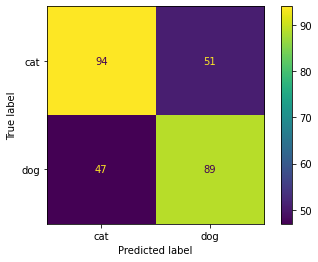

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['cat','dog'])


disp = disp.plot()

plt.show()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(testLabelsGlobal, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.67      0.66       141
           1       0.65      0.64      0.64       140

    accuracy                           0.65       281
   macro avg       0.65      0.65      0.65       281
weighted avg       0.65      0.65      0.65       281



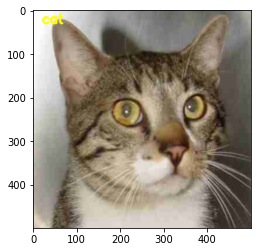

In [ ]:
#Step 7 : Test

image = cv2.imread(r"/content/cat.2254.jpg")

# resize the image
image = cv2.resize(image, fixed_size)

####################################
# Global Feature extraction
####################################
fv_hu_moments = fd_hu_moments(image)
fv_haralick   = fd_haralick(image)
fv_histogram  = fd_histogram(image)

###################################
# Concatenate global features
###################################
global_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])

# scale features in the range (0-1)
scaler   = MinMaxScaler(feature_range=(0, 1))
rescaled_feature = scaler.fit_transform(global_feature.reshape(1,-1))
#rescaled_feature  = np.array(rescaled_feature)
# predict label of test image
probs = classifier.predict(rescaled_feature.reshape(1,-1))[0]
prediction = probs.argmax(axis=0)
cv2.putText(image, train_labels[prediction], (20,30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0,255,255), 3)

# display the output image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

# Using Feed Forward Network

In [ ]:
""""We resize our image  to fixed spatial dimensions to ensure each and every image in the input dataset has the same “feature vector” size. 
This is a requirement when utilizing our neural network — each image must be represented by a vector.
In this case, we resize our image to 32 x 32 pixels and then flatten the 32 x 32 x 3 image (where we have three channels, one for each Red, Green, and Blue channel, respectively) 
into a 3,072-d feature vector."""

def image_to_feature_vector(image, size=(32, 32)):
	# resize the image to a fixed size, then flatten the image into
	# a list of raw pixel intensities
	return cv2.resize(image, size).flatten()

In [ ]:
#Step 1 : Read image from folder
!unzip /content/drive/MyDrive/Activity1/dataset_images.zip
imagePaths = '/content/dataset_images'

# initialize the data matrix and labels list
data = []
labels = []
# loop over the input images
for (i, imagePath) in enumerate(os.listdir(imagePaths)):
  print("Image read : ",imagePath)

#step 2 : Store image as numpy array

  image = cv2.imread(os.path.join(imagePaths,imagePath))
  print("Type : ",type(image))
  label = imagePath.split(os.path.sep)[-1].split(".")[0]
  # construct a feature vector raw pixel intensities, then update
  # the data matrix and labels list
  features = image_to_feature_vector(image)
  data.append(features)
  labels.append(label)
  # show an update every 1,000 images
  if i > 0 and i % 1000 == 0:
    print("[INFO] processed {}/{}".format(i, len(imagePaths)))
print("\nTotal no of images ",i)

Streaming output truncated to the last 5000 lines.
Image read :  cat.2639.jpg
Type :  <class 'numpy.ndarray'>
Image read :  cat.2678.jpg
Type :  <class 'numpy.ndarray'>
Image read :  cat.3097.jpg
Type :  <class 'numpy.ndarray'>
Image read :  dog.5775.jpg
Type :  <class 'numpy.ndarray'>
Image read :  dog.462.jpg
Type :  <class 'numpy.ndarray'>
Image read :  cat.2307.jpg
Type :  <class 'numpy.ndarray'>
Image read :  dog.12348.jpg
Type :  <class 'numpy.ndarray'>
Image read :  dog.228.jpg
Type :  <class 'numpy.ndarray'>
Image read :  cat.3172.jpg
Type :  <class 'numpy.ndarray'>
Image read :  cat.2787.jpg
Type :  <class 'numpy.ndarray'>
Image read :  dog.12479.jpg
Type :  <class 'numpy.ndarray'>
Image read :  cat.3045.jpg
Type :  <class 'numpy.ndarray'>
Image read :  cat.3080.jpg
Type :  <class 'numpy.ndarray'>
Image read :  dog.289.jpg
Type :  <class 'numpy.ndarray'>
Image read :  cat.2523.jpg
Type :  <class 'numpy.ndarray'>
Image read :  cat.10031.jpg
Type :  <class 'numpy.ndarray'>
Image

In [ ]:
"""handle scaling the input data to the range [0, 1], followed by converting the labels  from a set of integers to a set of vectors (a requirement for the cross-entropy loss function we will apply when training our neural network).

We then construct our training and testing splits , using 75% of the data for training and the remaining 25% for testing."""

'handle scaling the input data to the range [0, 1], followed by converting the labels  from a set of integers to a set of vectors (a requirement for the cross-entropy loss function we will apply when training our neural network).\n\nWe then construct our training and testing splits , using 75% of the data for training and the remaining 25% for testing.'

In [ ]:
# encode the labels, converting them from strings to integers
le = LabelEncoder()
print("Labels before encoding : ",labels)
print("No of cat images and dog images : \n")
unique_elements, counts_elements = np.unique(labels, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))
print("\n")
labels = le.fit_transform(labels)
print("Labels after encoding : ",labels)
# scale the input image pixels to the range [0, 1], then transform
# the labels into vectors in the range [0, num_classes] -- this
# generates a vector for each label where the index of the label
# is set to `1` and all other entries to `0`
data = np.array(data) / 255.0
labels = np_utils.to_categorical(labels, 2)

Labels before encoding :  ['cat', 'dog', 'dog', 'cat', 'cat', 'cat', 'dog', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'cat', 'cat', 'cat', 'dog', 'cat', 'cat', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat', 'dog', 'dog', 'dog', 'cat', 'cat', 'dog', 'dog', 'cat', 'dog', 'dog', 'cat', 'dog', 'dog', 'cat', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat', 'dog', 'cat', 'dog', 'dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'cat', 'cat', 'dog', 'dog', 'cat', 'dog', 'dog', 'cat', 'dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'cat', 'dog', 'dog', 'cat', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat', 'cat', 'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'dog', 'dog', 

In [ ]:
# partition the data into training and testing splits, using 90%
# of the data for training and the remaining 10% for testing
print("\n[INFO] constructing training/testing split...")
(trainData, testData, trainLabels, testLabels) = train_test_split(data, labels, test_size=0.1, stratify = labels, random_state=42)


[INFO] constructing training/testing split...


[[0. 1.]
 [1. 0.]] [1261 1266]


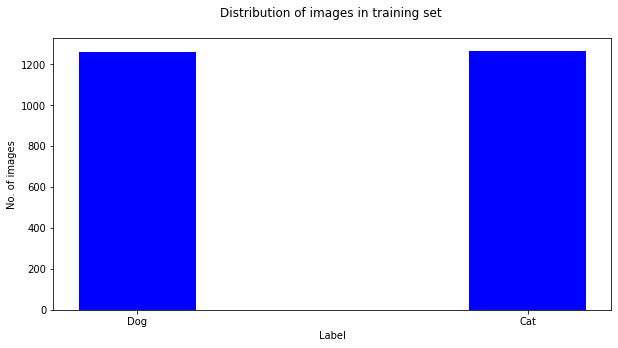

In [ ]:
unique_rows,counts_elements = np.unique(trainLabels,return_counts=True,  axis=0)
print(unique_rows,counts_elements)
fig = plt.figure(figsize = (10, 5)) 
labels = ['Dog','Cat']
# creating the bar plot 
plt.bar(labels, counts_elements, color ='blue',  width = 0.3) 
  
plt.xlabel("Label") 
plt.ylabel("No. of images") 
plt.title("Distribution of images in training set \n") 
plt.show() 

In [ ]:
"""Our input layer has 3,072 nodes, one for each of the 32 x 32 x 3 = 3,072 raw pixel intensities in our flattened input images.

We then have two hidden layers, each with 768 and 384 nodes, respectively. These node counts were determined via a cross-validation and hyperparameter tuning experiment performed offline.

The output layer has 2 nodes — one for each of the “dog” and “cat” labels.

We then apply a softmax  activation function on top of the network — this will give us our actual output class label probabilities."""

'Our input layer has 3,072 nodes, one for each of the 32 x 32 x 3 = 3,072 raw pixel intensities in our flattened input images.\n\nWe then have two hidden layers, each with 768 and 384 nodes, respectively. These node counts were determined via a cross-validation and hyperparameter tuning experiment performed offline.\n\nThe output layer has 2 nodes — one for each of the “dog” and “cat” labels.\n\nWe then apply a softmax  activation function on top of the network — this will give us our actual output class label probabilities.'

In [ ]:
"""#We will use the Sequential model for building the network.
Dense implements the operation: output = activation(dot(input, kernel) +
bias) where activation is the element-wise activation function passed as
the activation argument, kernel is a weights matrix created by the layer, and bias is a bias
vector created by the layer.
Arguments :
units Positive integer, dimensionality of the output space.
activation Activation function to use. If you don't specify anything, no activation is applied (ie.
"linear" activation: a(x) = x)."""

'#We will use the Sequential model for building the network.\nDense implements the operation: output = activation(dot(input, kernel) +\nbias) where activation is the element-wise activation function passed as\nthe activation argument, kernel is a weights matrix created by the layer, and bias is a bias\nvector created by the layer.\nArguments :\nunits Positive integer, dimensionality of the output space.\nactivation Activation function to use. If you don\'t specify anything, no activation is applied (ie.\n"linear" activation: a(x) = x).'

In [ ]:
#A simple neural network with Python and Keras
# define the architecture of the network
classes = np.unique(trainLabels)
classes_num = len(classes)
dim_data = np.prod(trainData.shape[1:])
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dim_data,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(classes_num, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 1026      
Total params: 1,837,058
Trainable params: 1,837,058
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#train the model

print("[INFO] compiling model...")
# sgd = SGD(lr=0.01)
# model.compile(loss="binary_crossentropy", optimizer=sgd,
# 	metrics=["accuracy"])
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
#history = model.fit(trainData, trainLabels, epochs=150, batch_size=128,	verbose=1)
history = model.fit(trainData, trainLabels, batch_size=128, epochs=50, verbose=1,validation_data=(testData, testLabels))

[INFO] compiling model...
Epoch 1/50
20/20 [==============================] - 1s 17ms/step - loss: 4.9812 - accuracy: 0.5100 - val_loss: 0.7259 - val_accuracy: 0.5018
Epoch 2/50
20/20 [==============================] - 0s 6ms/step - loss: 0.7425 - accuracy: 0.4721 - val_loss: 0.8822 - val_accuracy: 0.4982
Epoch 3/50
20/20 [==============================] - 0s 7ms/step - loss: 0.7532 - accuracy: 0.5246 - val_loss: 0.8114 - val_accuracy: 0.5018
Epoch 4/50
20/20 [==============================] - 0s 6ms/step - loss: 0.7549 - accuracy: 0.4978 - val_loss: 0.7160 - val_accuracy: 0.5018
Epoch 5/50
20/20 [==============================] - 0s 6ms/step - loss: 0.7244 - accuracy: 0.5116 - val_loss: 0.8328 - val_accuracy: 0.5018
Epoch 6/50
20/20 [==============================] - 0s 6ms/step - loss: 0.7074 - accuracy: 0.5445 - val_loss: 0.7061 - val_accuracy: 0.5018
Epoch 7/50
20/20 [==============================] - 0s 6ms/step - loss: 0.6814 - accuracy: 0.5454 - val_loss: 0.6988 - val_accuracy: 

In [ ]:
"""To train our model, we’ll set the learning rate parameter of SGD to 0.01. We’ll use the binary_crossentropy  loss function for the network as well.

In most cases, you’ll want to use just crossentropy , but since there are only two class labels, we use binary_crossentropy . For > 2 class labels, make sure you use crossentropy .

The network is then allowed to train for a total of 50 epochs, meaning that the model “sees” each individual training example 50 times in an attempt to learn an underlying pattern."""

'To train our model, we’ll set the learning rate parameter of SGD to 0.01. We’ll use the binary_crossentropy  loss function for the network as well.\n\nIn most cases, you’ll want to use just crossentropy , but since there are only two class labels, we use binary_crossentropy . For > 2 class labels, make sure you use crossentropy .\n\nThe network is then allowed to train for a total of 50 epochs, meaning that the model “sees” each individual training example 50 times in an attempt to learn an underlying pattern.'

In [ ]:
#Evaluation

[test_loss, test_acc] = model.evaluate(testData, testLabels)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

9/9 [==============================] - 0s 3ms/step - loss: 0.7211 - accuracy: 0.5801
Evaluation result on Test Data : Loss = 0.7210942506790161, accuracy = 0.5800711512565613


cat.2280.jpg
[INFO] classifying cat.2280.jpg


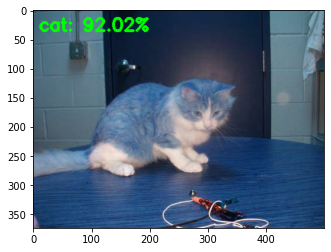

dog.4911.jpg
[INFO] classifying dog.4911.jpg


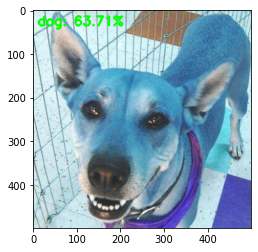

dog.4910.jpg
[INFO] classifying dog.4910.jpg


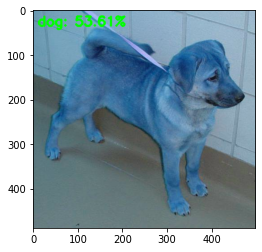

In [ ]:
# loop over our testing images
CLASSES = ["cat", "dog"]
pth = '/content/drive/MyDrive/Activity1/test_images'
for (i, imagePath) in enumerate(os.listdir(pth)):
  if imagePath.endswith(".jpg"):
    print(imagePath)
    #image = cv2.imread(os.path.join(pth,imagePath))
    # load the image, resize it to a fixed 32 x 32 pixels (ignoring
    # aspect ratio), and then extract features from it
    print("[INFO] classifying {}".format(imagePath[imagePath.rfind("/") + 1:]))
    image = cv2.imread(os.path.join(pth,imagePath))

    features = image_to_feature_vector(image) / 255.0
    features = np.array([features])
    probs = model.predict(features)[0]
    prediction = probs.argmax(axis=0)
    # draw the class and probability on the test image and display it
    # to our screen
    label = "{}: {:.2f}%".format(CLASSES[prediction],probs[prediction] * 100)
    cv2.putText(image, label, (10, 35), cv2.FONT_HERSHEY_SIMPLEX,1.0, (0, 255, 0), 3)
    #Show the image with matplotlib
    plt.imshow(image)
    plt.show()